# Time Series Forcasting Deep Learning
* **Data Link:** https://in.investing.com/crypto/bitcoin/historical-data
* **Data discription :** Bit Coin Indian Rupees Price prediction using different Deep Learning Model

## Models to built for Time Series Prediction

We can build almost any kind of model for our problem as long as the data inputs and outputs are formatted correctly.

However, just because we *can* build *almost any* kind of model, doesn't mean it'll perform well/should be used in a production setting.

We'll see what this means as we build and evaluate models throughout.

Before we discuss what modelling experiments we're going to run, there are two terms you should be familiar with, **horizon** and **window**. 
  * **horizon** = number of timesteps to predict into future
  * **window** = number of timesteps from past used to predict **horizon**

For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

Now, how about those modelling experiments?


| Model Number | Model Type | Horizon size | Window size | Extra data |
| ----- | ----- | ----- | ----- | ----- |
| 0 | Naïve model (baseline) | NA | NA | NA |
| 1 | Dense model | 1 | 7 | NA |
| 2 | Same as 1 | 1 | 30 | NA | 
| 3 | Same as 1 | 7 | 30 | NA |
| 4 | Conv1D | 1 | 7 | NA |
| 5 | LSTM | 1 | 7 | NA |
| 6 | Same as 1 (but with multivariate data) | 1 | 7 | Block reward size |

>**Note:** To reiterate, as you can see, we can build many types of models for the data we're working with. But that doesn't mean that they'll perform well. Deep learning is a powerful technique but it doesn't always work. And as always, start with a simple model first and then add complexity as needed. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

## Converting Data into time series data type

In [2]:
bit_coin = pd.read_csv("Bitcoin Historical Data - Investing.com India (3).csv")
bit_coin.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 24, 2023","23,010.7","22,916.3","23,156.1","22,766.2",302.54K,0.42%
1,"Jan 23, 2023","22,915.5","22,709.0","23,161.8","22,527.9",327.85K,0.91%
2,"Jan 22, 2023","22,707.8","22,775.7","23,068.7","22,323.0",280.64K,-0.30%
3,"Jan 21, 2023","22,775.7","22,677.5","23,304.5","22,461.1",382.69K,0.43%
4,"Jan 20, 2023","22,677.2","21,074.9","22,718.5","20,879.3",373.74K,7.57%


In [3]:
bit_coin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4574 entries, 0 to 4573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4574 non-null   object
 1   Price     4574 non-null   object
 2   Open      4574 non-null   object
 3   High      4574 non-null   object
 4   Low       4574 non-null   object
 5   Vol.      4574 non-null   object
 6   Change %  4574 non-null   object
dtypes: object(7)
memory usage: 250.3+ KB


In [4]:
# Converting Date Column into datetime Formate 
bit_coin['Date'] = pd.to_datetime(bit_coin['Date'],format="%b %d, %Y")
bit_coin.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-01-24,"23,010.7","22,916.3","23,156.1","22,766.2",302.54K,0.42%
1,2023-01-23,"22,915.5","22,709.0","23,161.8","22,527.9",327.85K,0.91%
2,2023-01-22,"22,707.8","22,775.7","23,068.7","22,323.0",280.64K,-0.30%
3,2023-01-21,"22,775.7","22,677.5","23,304.5","22,461.1",382.69K,0.43%
4,2023-01-20,"22,677.2","21,074.9","22,718.5","20,879.3",373.74K,7.57%


In [5]:
bit_coin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4574 entries, 0 to 4573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4574 non-null   datetime64[ns]
 1   Price     4574 non-null   object        
 2   Open      4574 non-null   object        
 3   High      4574 non-null   object        
 4   Low       4574 non-null   object        
 5   Vol.      4574 non-null   object        
 6   Change %  4574 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 250.3+ KB


In [6]:
# Sorting According to Date Column
bit_coin = bit_coin.sort_values('Date',ascending=True)
bit_coin.head()

,Date,Price,Open,High,Low,Vol.,Change %
4573,2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%
4572,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%
4571,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
4570,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
4569,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%


In [7]:
# Converting Price coulmn into float32 which were in string data type
pr = bit_coin['Price'].astype('str')
pr = pr.to_list()


j=[]
for x in pr:
    y=x.replace(",",'')
    j.append(y)

bit_coin["Price"] = j
bit_coin['Price'] = bit_coin["Price"].astype('float64')
bit_coin.head()

,Date,Price,Open,High,Low,Vol.,Change %
4573,2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%
4572,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%
4571,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
4570,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
4569,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%


In [8]:
bit_coin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4574 entries, 4573 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4574 non-null   datetime64[ns]
 1   Price     4574 non-null   float64       
 2   Open      4574 non-null   object        
 3   High      4574 non-null   object        
 4   Low       4574 non-null   object        
 5   Vol.      4574 non-null   object        
 6   Change %  4574 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 285.9+ KB


In [9]:
# Removing all Unecessary columns
bit_coin_price = bit_coin.drop(columns=["Open","High","Low","Vol.","Change %"],axis=1)
bit_coin_price

,Date,Price
4573,2010-07-18,0.1
4572,2010-07-19,0.1
4571,2010-07-20,0.1
4570,2010-07-21,0.1
4569,2010-07-22,0.1
...,...,...
4,2023-01-20,22677.2
3,2023-01-21,22775.7
2,2023-01-22,22707.8
1,2023-01-23,22915.5


In [10]:
# Cheking data type
bit_coin_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4574 entries, 4573 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4574 non-null   datetime64[ns]
 1   Price   4574 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 107.2 KB


In [11]:
# Final prepration of data
bit_coin_price = bit_coin_price.set_index(['Date'])
bit_coin_price

,Price
Date,
2010-07-18,0.1
2010-07-19,0.1
2010-07-20,0.1
2010-07-21,0.1
2010-07-22,0.1
...,...
2023-01-20,22677.2
2023-01-21,22775.7
2023-01-22,22707.8


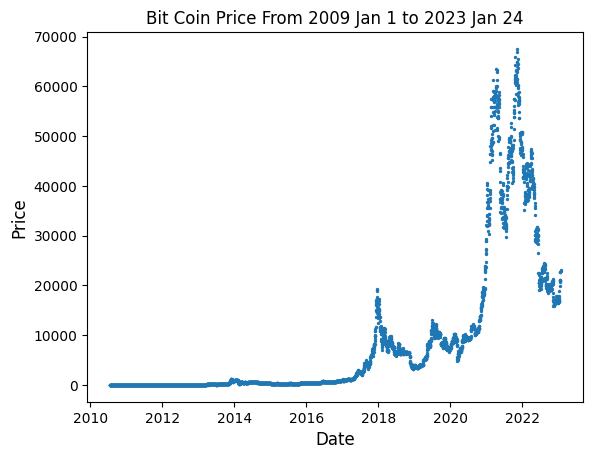

In [12]:
plt.scatter(bit_coin_price.index,bit_coin_price['Price'],s=2)
plt.title('Bit Coin Price From 2009 Jan 1 to 2023 Jan 24',fontsize=12)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

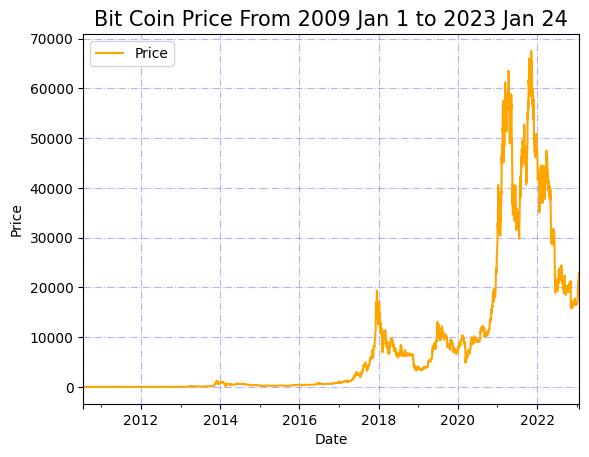

In [13]:
bit_coin_price.plot(color='orange')
plt.title('Bit Coin Price From 2009 Jan 1 to 2023 Jan 24',fontsize=15)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.grid(ls='-.',color='blue',alpha=0.3)
plt.show()

In [14]:
time = bit_coin_price.index.to_numpy()
prices = bit_coin_price['Price'].to_numpy()

time[:10],prices[:10]

(array(['2010-07-18T00:00:00.000000000', '2010-07-19T00:00:00.000000000',
        '2010-07-20T00:00:00.000000000', '2010-07-21T00:00:00.000000000',
        '2010-07-22T00:00:00.000000000', '2010-07-23T00:00:00.000000000',
        '2010-07-24T00:00:00.000000000', '2010-07-25T00:00:00.000000000',
        '2010-07-26T00:00:00.000000000', '2010-07-27T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]))

In [15]:
# Creating Train Test Split right way not as we are using sklear train test split
split_size =int(np.round(.80*len(prices)))

# Create train data splits (everything before the split)
X_train,y_train=time[:split_size],prices[:split_size]

# Create test data splits (everything after the split)
X_test,y_test=time[split_size:],prices[split_size:]

len(X_train),len(X_test),len(y_train),len(y_test)

(3659, 915, 3659, 915)

In [16]:
#plt.figure(figsize=(15, 5))
#plt.title('Bit Coin Price From 2016 Oct 1 to 2023 Jan 24',fontsize=12)
#plt.scatter(X_train,y_train,s=3,label="Train data")
#plt.scatter(X_test,y_test,s=3,label="Test data")
#plt.xlabel("Date")
#plt.ylabel("Bit Coin Price")
#plt.legend(fontsize=14)
#plt.show();

## Graph Plotig Function

In [17]:
# Create function to plot Time series
def plot_time_series(timestep,value,format='.',start=0,end=None,label=None):
    """
    Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

    Parameters
    ---------
    timesteps : array of timesteps
    values : array of values across time
    format : style of plot, default "."
    start : where to start the plot (setting a value will index from start of timesteps & values)
    end : where to end the plot (setting a value will index from end of timesteps & values)
    label : label to show on plot of values
    """
        
    # Plot the series
    plt.plot(timestep[start:end],value[start:end],format,label=label)
    plt.xlabel('Time')
    plt.ylabel('Bit Coin Prices')
    if label:
        plt.legend(fontsize=15)
    else:
        pass
    plt.grid(color='blue',ls='-.',alpha=0.3)

Text(0.5, 1.0, 'Bit Coin Price From 2009 Jan 1 to 2023 Jan 24')

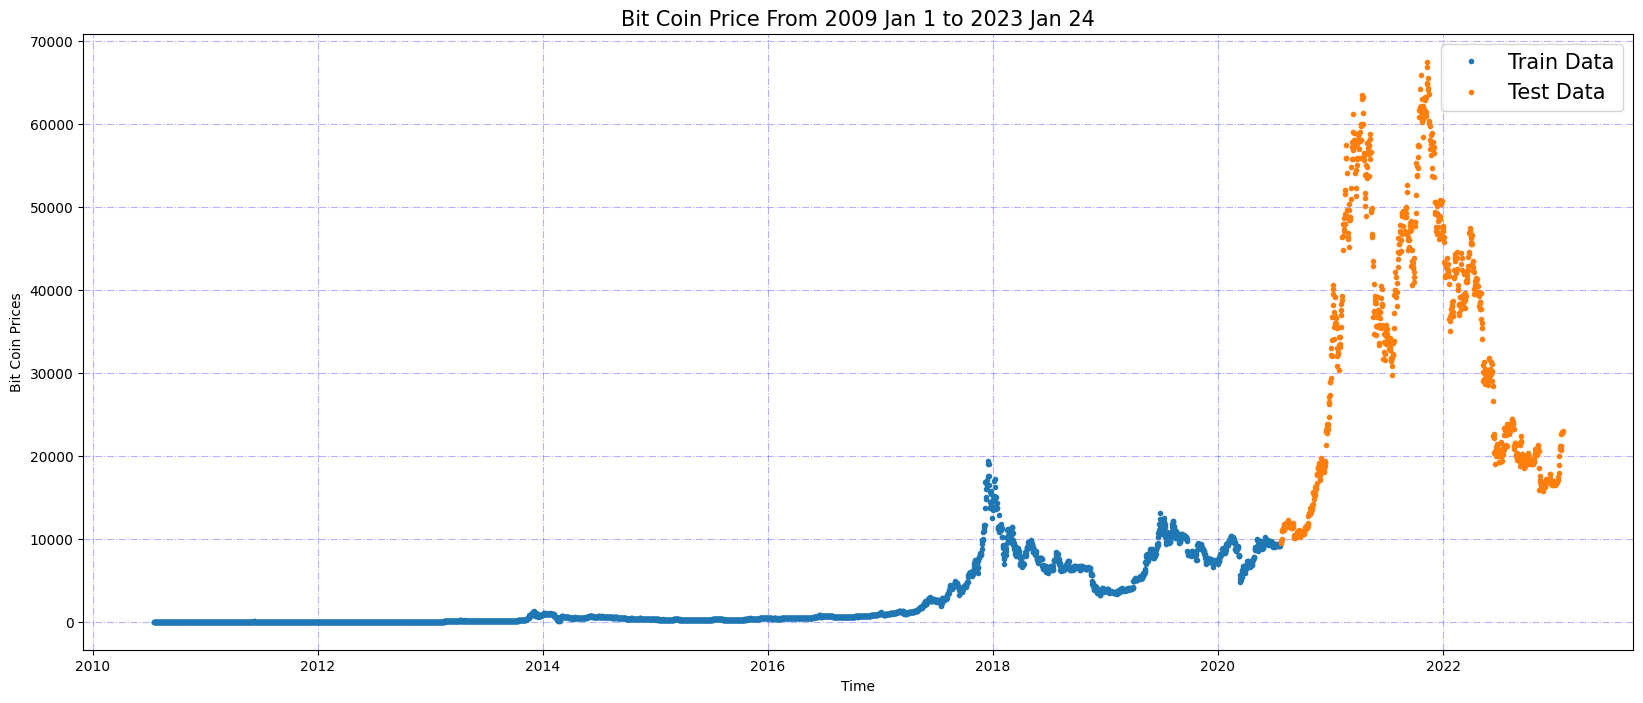

In [18]:
# Check the function is working
plt.figure(figsize=(20, 8))
plot_time_series(X_train,y_train,label='Train Data')
plot_time_series(X_test,y_test,label='Test Data')
plt.title('Bit Coin Price From 2009 Jan 1 to 2023 Jan 24',fontsize=15)

## Model 0: Naïve forecast (baseline)

As usual, let's start with a baseline.

One of the most common baseline models for time series forecasting, the naïve model (also called the [naïve forecast](https://otexts.com/fpp3/simple-methods.html#na%C3%AFve-method)), requires no training at all.

That's because all the naïve model does is use the previous timestep value to predict the next timestep value.

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In [19]:
# create naive forcast
navive_forcast=y_test[:-1] # Naïve forecast equals every value excluding the last value
navive_forcast[:10],navive_forcast[-10:] # View frist 10 and last 10

(array([ 9546.4,  9704.1,  9932.5, 11022.8, 10908.5, 11105.9, 11096.2,
        11333.4, 11803.1, 11066.8]),
 array([20958.2, 20879.8, 21184.2, 21137.1, 20670.6, 21081.2, 22677.2,
        22775.7, 22707.8, 22915.5]))

Text(0.5, 1.0, 'Bit Coin Price From 2009 Jan 1 to 2023 Jan 24')

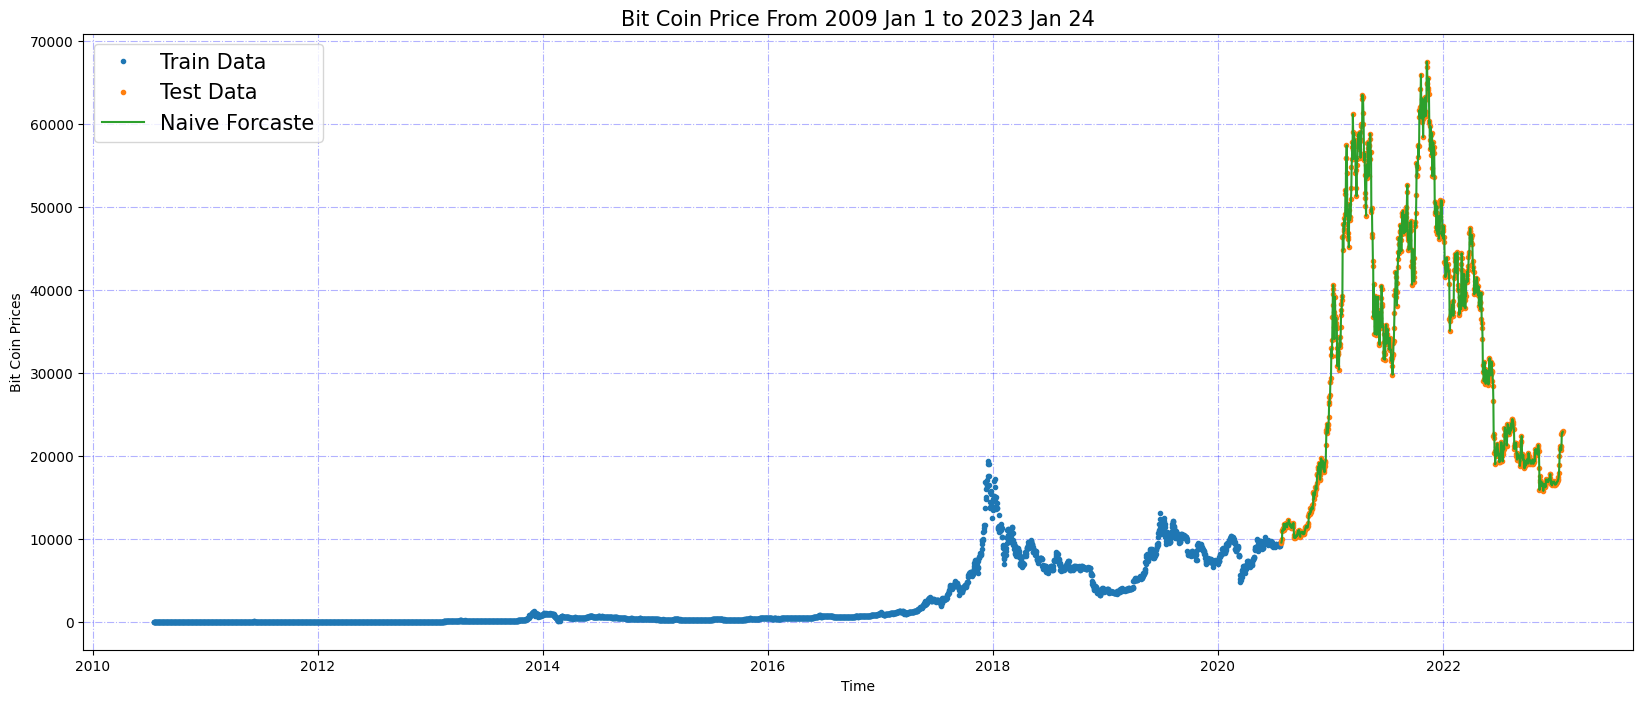

In [20]:
# plot naive forcast
plt.figure(figsize=(20, 8))
plot_time_series(X_train,y_train,label="Train Data")
plot_time_series(X_test,y_test,label='Test Data')
plot_time_series(X_test[1:],navive_forcast,label='Naive Forcaste',format='-')
plt.title('Bit Coin Price From 2009 Jan 1 to 2023 Jan 24',fontsize=15)

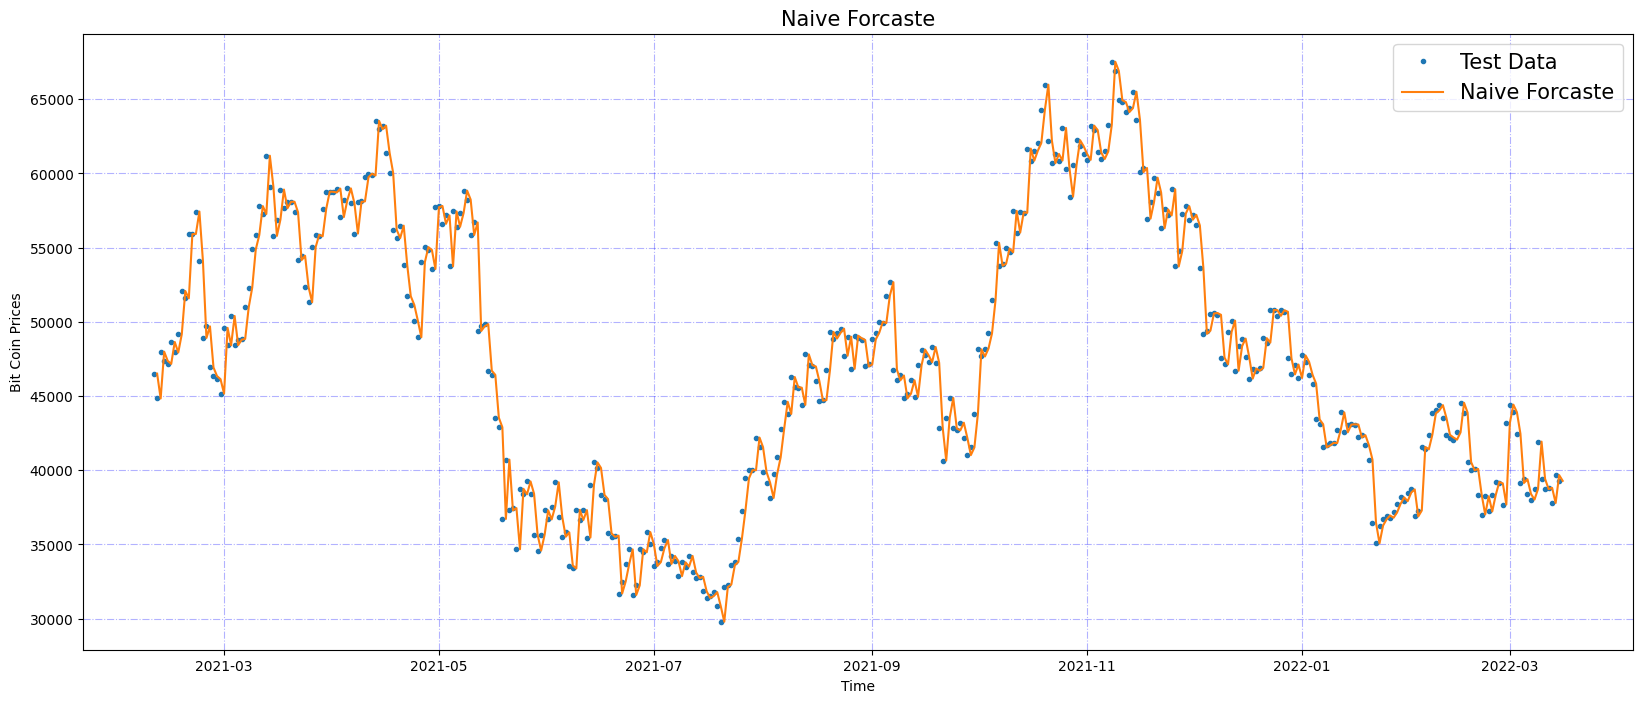

In [21]:
# plot naive forcast
offset=200
end=600
plt.figure(figsize=(20, 8))
plot_time_series(X_test,y_test,label='Test Data',start=offset,end=end)
plot_time_series(X_test[1:],navive_forcast,label='Naive Forcaste',format='-',start=offset,end=end)
plt.title('Naive Forcaste',fontsize=15)
plt.show()

The mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a forecasting method in statistics. It usually expresses the accuracy as a ratio defined by the formula:

In [22]:
def evaluate_preds(y_true,y_pred):
    
    # Make sure float32 (for metric calculations)# Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    
    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
    rmse = np.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
    
    return { 'mae': mae.numpy(),
             'mse': mse.numpy(),
             'rmse': rmse,
             'mape': mape.numpy(),
           }
    

In [23]:
naive_result = evaluate_preds(y_true=y_test[1:],
                              y_pred=navive_forcast
                             )
naive_result

{'mae': 905.2924, 'mse': 1938106.5, 'rmse': 1392.1589, 'mape': 2.5954235}

In [24]:
len(y_test[1:]),len(navive_forcast)

(914, 914)

In [25]:
np.mean(y_test)

33194.833224043716

-----------------------------

In [26]:
#HORIZON = 5 # predict 1 step at a time
#WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

# Creating Dataset
x=[100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121]

#j=[]
#l=[]
#start=0
#for a in range(len(x)+1):
    #x[start:WINDOW_SIZE]
    #print(start)
    #print(x[start:WINDOW_SIZE+start])
    #print(len(x[start:WINDOW_SIZE+start]))
    #print(x[WINDOW_SIZE+start])
    #print(WINDOW_SIZE+start)
    #print(WINDOW_SIZE+start+HORIZON-(WINDOW_SIZE+start))
    #if len(x[start:WINDOW_SIZE+start]) ==7 and (WINDOW_SIZE+start!=len(x)-1) and (len(x[WINDOW_SIZE+start:WINDOW_SIZE+start+HORIZON])==HORIZON):
        #j.append(x[start:WINDOW_SIZE+start])
        #l.append(x[WINDOW_SIZE+start:WINDOW_SIZE+start+HORIZON])
        #start+=1
    #else:
        #break

In [27]:
#l,len(l)

In [28]:
#j,len(j)

In [29]:
#np.array(l).reshape(len(l),HORIZON)

In [30]:
#np.array(j).shape

-----------------------

## Format Data Part 2: Windowing dataset

Why do we window?

Windowing is a method to turn a time series dataset into **supervised learning problem**. 

In other words, we want to use windows of the past to predict the future.

For example for a univariate time series, windowing for one week (`window=7`) to predict the next single value (`horizon=1`) might look like:

```
Window for one week (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

Or for the price of Bitcoin, it'd look like:

```
Window for one week with the target of predicting the next day (Bitcoin prices)

[123.654, 125.455, 108.584, 118.674, 121.338, 120.655, 121.795] -> [123.033]
[125.455, 108.584, 118.674, 121.338, 120.655, 121.795, 123.033] -> [124.049]
[108.584, 118.674, 121.338, 120.655, 121.795, 123.033, 124.049] -> [125.961]
```


In [31]:
# Create function to view NumPy arrays as windows 

def make_windows(x, WINDOW_SIZE=7, HORIZON=1):
    
    windows=[]
    labes=[]
    start=0
    for a in range(len(x)+1):
        x[start:WINDOW_SIZE]
        #print(start)
        #print(x[start:WINDOW_SIZE+start])
        #print(len(x[start:WINDOW_SIZE+start]))
        #print(x[WINDOW_SIZE+start])
        #print(WINDOW_SIZE+start)
        #print(WINDOW_SIZE+start+HORIZON-(WINDOW_SIZE+start))
        if len(x[start:WINDOW_SIZE+start]) ==WINDOW_SIZE and (WINDOW_SIZE+start!=len(x)-1) and (len(x[WINDOW_SIZE+start:WINDOW_SIZE+start+HORIZON])==HORIZON):
            windows.append(x[start:WINDOW_SIZE+start])
            labes.append(x[WINDOW_SIZE+start:WINDOW_SIZE+start+HORIZON])
            start+=1
        else:
            break
            
    return np.array(windows),np.array(labes).reshape(len(labes),HORIZON)

In [32]:
j,l=make_windows(x=x,WINDOW_SIZE=7,HORIZON=1)
j,len(j),j.shape

(array([[100, 101, 102, 103, 104, 105, 106],
        [101, 102, 103, 104, 105, 106, 107],
        [102, 103, 104, 105, 106, 107, 108],
        [103, 104, 105, 106, 107, 108, 109],
        [104, 105, 106, 107, 108, 109, 110],
        [105, 106, 107, 108, 109, 110, 111],
        [106, 107, 108, 109, 110, 111, 112],
        [107, 108, 109, 110, 111, 112, 113],
        [108, 109, 110, 111, 112, 113, 114],
        [109, 110, 111, 112, 113, 114, 115],
        [110, 111, 112, 113, 114, 115, 116],
        [111, 112, 113, 114, 115, 116, 117],
        [112, 113, 114, 115, 116, 117, 118],
        [113, 114, 115, 116, 117, 118, 119]]),
 14,
 (14, 7))

In [33]:
l,len(l),l.shape

(array([[107],
        [108],
        [109],
        [110],
        [111],
        [112],
        [113],
        [114],
        [115],
        [116],
        [117],
        [118],
        [119],
        [120]]),
 14,
 (14, 1))

In [34]:
windows_data_model_1,labels_data_model_1 = make_windows(x = prices,
                                                       WINDOW_SIZE=7,
                                                       HORIZON=1
                                                       )
len(windows_data_model_1),len(labels_data_model_1)

(4566, 4566)

In [35]:
for i in range(10):
    if i !=0:
        #print(-i)
        print(f" Windows : {windows_data_model_1[-i]}, --> Labes : {labels_data_model_1[-i]}")
    

 Windows : [21184.2 21137.1 20670.6 21081.2 22677.2 22775.7 22707.8], --> Labes : [22915.5]
 Windows : [20879.8 21184.2 21137.1 20670.6 21081.2 22677.2 22775.7], --> Labes : [22707.8]
 Windows : [20958.2 20879.8 21184.2 21137.1 20670.6 21081.2 22677.2], --> Labes : [22775.7]
 Windows : [19927.  20958.2 20879.8 21184.2 21137.1 20670.6 21081.2], --> Labes : [22677.2]
 Windows : [18851.3 19927.  20958.2 20879.8 21184.2 21137.1 20670.6], --> Labes : [21081.2]
 Windows : [17942.3 18851.3 19927.  20958.2 20879.8 21184.2 21137.1], --> Labes : [20670.6]
 Windows : [17439.1 17942.3 18851.3 19927.  20958.2 20879.8 21184.2], --> Labes : [21137.1]
 Windows : [17180.1 17439.1 17942.3 18851.3 19927.  20958.2 20879.8], --> Labes : [21184.2]
 Windows : [17119.  17180.1 17439.1 17942.3 18851.3 19927.  20958.2], --> Labes : [20879.8]


## Turning windows into training and test sets 

Time to turn our windows into training and test splits.

We could've windowed our existing training and test splits, however, with the nature of windowing (windowing often requires an offset at some point in the data), it usually works better to window the data first, then split it into training and test sets.

Let's write a function which takes in full sets of windows and their labels and splits them into train and test splits.

In [36]:
# Make Train/Test split Function
def make_train_test_split(windows,labels,test_split=0.2):
    """
    train_window,train_labels,test_window,test_labels
    """
    split_size =int(np.round((1-test_split)*len(windows)))
    train_window = windows[:split_size] 
    train_labels = labels[:split_size]
    test_window = windows[split_size:]
    test_labels = labels[split_size:]
    return train_window,train_labels,test_window,test_labels

In [37]:
train_windows,train_labels,test_windows,test_labels= make_train_test_split(windows=windows_data_model_1,
                                                                            labels=labels_data_model_1,
                                                                            test_split=0.2
                                                                           )
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(3653, 3653, 913, 913)

In [38]:
train_windows[:5],test_windows[:5],train_labels[:5],test_labels[:5]

(array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]),
 array([[ 9170.2,  9208. ,  9162.4,  9387.3,  9513.7,  9599.6,  9546.4],
        [ 9208. ,  9162.4,  9387.3,  9513.7,  9599.6,  9546.4,  9704.1],
        [ 9162.4,  9387.3,  9513.7,  9599.6,  9546.4,  9704.1,  9932.5],
        [ 9387.3,  9513.7,  9599.6,  9546.4,  9704.1,  9932.5, 11022.8],
        [ 9513.7,  9599.6,  9546.4,  9704.1,  9932.5, 11022.8, 10908.5]]),
 array([[0.1],
        [0.1],
        [0.1],
        [0.1],
        [0.1]]),
 array([[ 9704.1],
        [ 9932.5],
        [11022.8],
        [10908.5],
        [11105.9]]))

In [39]:
# Check to see if same (accounting for horizon and window size) window=7,horizan=1 (no,window),(no,horizon)
train_windows.shape,test_windows.shape,train_labels.shape,test_labels.shape

((3653, 7), (913, 7), (3653, 1), (913, 1))

## Make a modelling checkpoint
[`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback.

In [40]:
import os

# Creating Model checkpoint function
def model_check_point(model_name,file_path='model_exeriments'):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(file_path,model_name), # Creating file path to save model
                                              verbose=0, # only output a limited amount of text
                                              save_best_only=True # save only the best model
                                             )

## Model to built for Time Series
* **Model 1: Dense model (window = 7, horizon = 1)**
* **Model 2: Dense (window = 30, horizon = 1)**
* **Model 3: Dense (window = 30, horizon = 7)**
* **Model 4: Conv1D**
* **Model 5: RNN (LSTM)**
* **Model 6: Multivariate Dense Model**

## Model 1: Dense model (window = 7, horizon = 1)

We're going to start by keeping it simple, `model_1` will have:
* A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs

In [41]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

# Set Random seed
tf.random.set_seed(42)

# Construct Model_1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(HORIZON,activation='linear') # linear activation is the same as having no activation
],name='model_1_dense') # give the model a name so we can save it

# Compile Model_1
model_1.compile(loss=tf.keras.losses.MAE,
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['mae']  # we don't necessarily need this when the loss function is already MAE
               )

# Fit Model_1
model_1_history = model_1.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              validation_data=(test_windows,test_labels),
                              callbacks=[model_check_point(model_name='model_1_dense')],
                              verbose=0
                             )

INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_1_dense\assets


Because of the small size of our data (less than 5000 total samples), the model trains very fast.

Let's evaluate it.

In [42]:
# Evaluate model on test data
model_1.evaluate(test_windows,test_labels)

29/29 [==============================] - 0s 1ms/step - loss: 1241.3558 - mae: 1241.3558


[1241.3558349609375, 1241.3558349609375]

You'll notice the model achieves the same `val_loss` (in this case, this is MAE) as the last epoch.

But if we load in the version of `model_1` which was saved to file using the `ModelCheckpoint` callback, we should see an improvement in results.

In [43]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model('model_exeriments/model_1_dense')
model_1.evaluate(test_windows,test_labels)
                                     

29/29 [==============================] - 0s 2ms/step - loss: 907.8520 - mae: 907.8520


[907.8519897460938, 907.8519897460938]

Much better! Due to the fluctuating performance of the model during training, loading back in the best performing model see's a sizeable improvement in MAE.`

## Making forecasts with a model (on the test dataset)

We've trained a model and evaluated the it on the test data, but the project we're working on is called BitPredict 💰📈 so how do you think we could use our model to make predictions?

Since we're going to be running more modelling experiments, let's write a function which: 
1. Takes in a trained model (just like `model_1`)
2. Takes in some input data (just like the data the model was trained on) 
3. Passes the input data to the model's `predict()` method
4. Returns the predictions



In [44]:
def make_predict(model,input_data):
    """
    Uses model to make predictions on input_data.

    Parameters
    ----------
    model: trained model 
    input_data: windowed input data (same kind of data model was trained on)

    Returns model predictions on input_data.
    """
    prediction = model.predict(input_data)
    return tf.squeeze(prediction)

In [45]:
# Making pridiction with data and reduce the dimensions of data as well using function
test_labels_pred= make_predict(model_1,test_windows)
test_labels_pred[:10],test_labels_pred.shape

29/29 [==============================] - 0s 1ms/step


(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 9567.485,  9706.49 ,  9934.291, 10924.978, 10947.548, 11131.742,
        11150.529, 11369.018, 11798.826, 11168.204], dtype=float32)>,
 TensorShape([913]))

In [46]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=test_labels_pred
                                )
model_1_results

{'mae': 907.8519, 'mse': 1950373.1, 'rmse': 1396.5576, 'mape': 2.603221}

How did our model go? Did it beat the naïve forecast?

In [47]:
naive_result

{'mae': 905.2924, 'mse': 1938106.5, 'rmse': 1392.1589, 'mape': 2.5954235}

Text(0.5, 1.0, 'Model 1 Dense Windows=7 Horizon=1 Predcictin ')

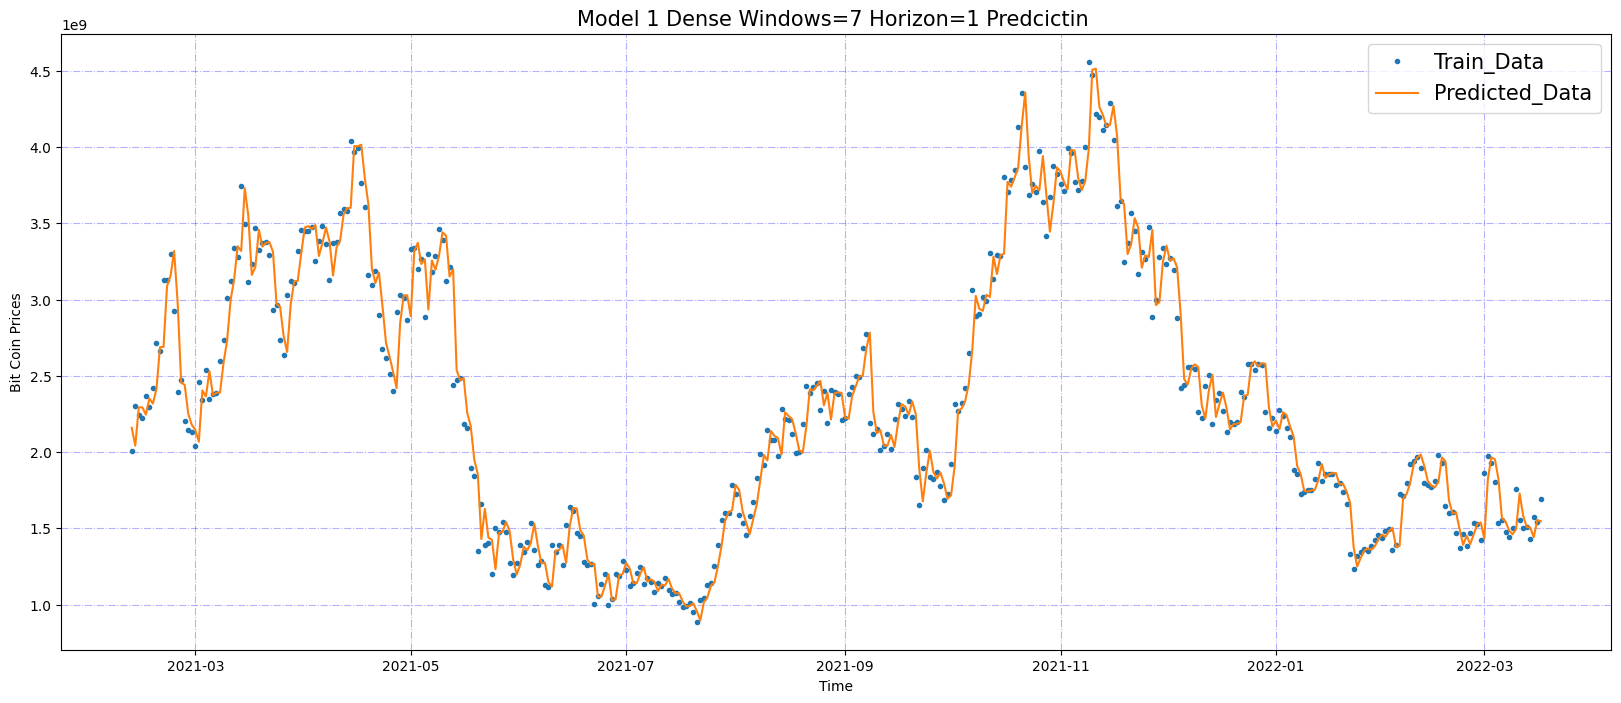

In [48]:
# Plot prediction 
offset=200
end=600
plt.figure(figsize=(20, 8))
plot_time_series(timestep=time[-len(test_labels):],value=tf.square(test_labels),start=offset,end=end,label='Train_Data')
plot_time_series(timestep=time[-len(test_labels):],value=tf.square(test_labels_pred),format='-',start=offset,end=end,label='Predicted_Data')
plt.title('Model 1 Dense Windows=7 Horizon=1 Predcictin ',fontsize=15)

## Model 2: Dense (window = 30, horizon = 1)

A naïve model is currently beating our handcrafted deep learning model. 

We can't let this happen.

Let's continue our modelling experiments.

In [49]:
# Cheking full size of data
len(prices)

4574

In [50]:
# Set window size and horizon 
WINDOW_SIZE=30
HORIZON=1

# Creating data with window=30 and horizon=1
windows_data_model_2,labels_data_model_2 = make_windows(x=prices,WINDOW_SIZE=WINDOW_SIZE,HORIZON=HORIZON)
len(windows_data_model_2),len(labels_data_model_2)

(4543, 4543)

In [51]:
# Checking window and horizon 
for i in range(3):
    if i!=0:
        print(f"Windows: {windows_data_model_2[-i]}\n\n  Labes --> {labels_data_model_2[-i]}\n")

Windows: [16837.2 16831.8 16918.1 16706.1 16546.2 16636.4 16607.2 16537.4 16618.4
 16674.3 16674.2 16852.1 16829.8 16950.9 16943.6 17119.  17180.1 17439.1
 17942.3 18851.3 19927.  20958.2 20879.8 21184.2 21137.1 20670.6 21081.2
 22677.2 22775.7 22707.8]

  Labes --> [22915.5]

Windows: [16779.1 16837.2 16831.8 16918.1 16706.1 16546.2 16636.4 16607.2 16537.4
 16618.4 16674.3 16674.2 16852.1 16829.8 16950.9 16943.6 17119.  17180.1
 17439.1 17942.3 18851.3 19927.  20958.2 20879.8 21184.2 21137.1 20670.6
 21081.2 22677.2 22775.7]

  Labes --> [22707.8]



In [52]:
# Making Train / Test Split of data
train_windows_model_2,train_labels_model_2,test_windows_model_2,test_labels_model_2=make_train_test_split(windows=windows_data_model_2,
                                                                                                           labels=labels_data_model_2)
len(train_windows_model_2),len(train_labels_model_2),len(test_windows_model_2),len(test_labels_model_2)           

(3634, 3634, 909, 909)

Data prepared!

Now let's construct `model_2`, a model with the same architecture as `model_1` as well as the same training routine.

In [53]:
# Set Random state
tf.random.set_seed(42)

# Construct Model_2
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(HORIZON,activation='linear')    
],name="model_2_dense")

# Compile
model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam()
               )

# Fit Model_2
model_2_history = model_2.fit(x=train_windows_model_2,
                              y=train_labels_model_2,
                              epochs=100,
                              validation_data=(test_windows_model_2,test_labels_model_2),
                              callbacks=[model_check_point(model_name='model_2_dense')],
                              verbose=0
                             )

INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_2_dense\assets


In [54]:
# Evaluating Model_2
model_2.evaluate(test_windows_model_2,test_labels_model_2)

29/29 [==============================] - 0s 1ms/step - loss: 1187.4827


1187.482666015625

In [55]:
# Loading Best model from Chekoint and Evaluate
model_2 = tf.keras.models.load_model('model_exeriments/model_2_dense')
model_2.evaluate(test_windows_model_2,test_labels_model_2)                                 

29/29 [==============================] - 0s 2ms/step - loss: 934.3113


934.311279296875

In [56]:
# Results of model-2
test_label_model_2_preds = make_predict(model_2,
                                        input_data=test_windows_model_2
                                       )
test_label_model_2_preds[:10]

29/29 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10957.786, 11100.193, 11171.472, 11359.132, 11774.483, 11246.891,
       11213.458, 11237.054, 11730.076, 11819.944], dtype=float32)>

In [57]:
# Geting Resutlt of model_2
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels_model_2),
                                 y_pred=test_label_model_2_preds
                                )
model_2_results

{'mae': 934.31134, 'mse': 2008168.6, 'rmse': 1417.0986, 'mape': 2.6642737}

In [58]:
naive_result

{'mae': 905.2924, 'mse': 1938106.5, 'rmse': 1392.1589, 'mape': 2.5954235}

In [59]:
len(test_labels_model_2)

909

Text(0.5, 1.0, 'Model 2 Dense Windows = 30 Horizon = 1 Predciction ')

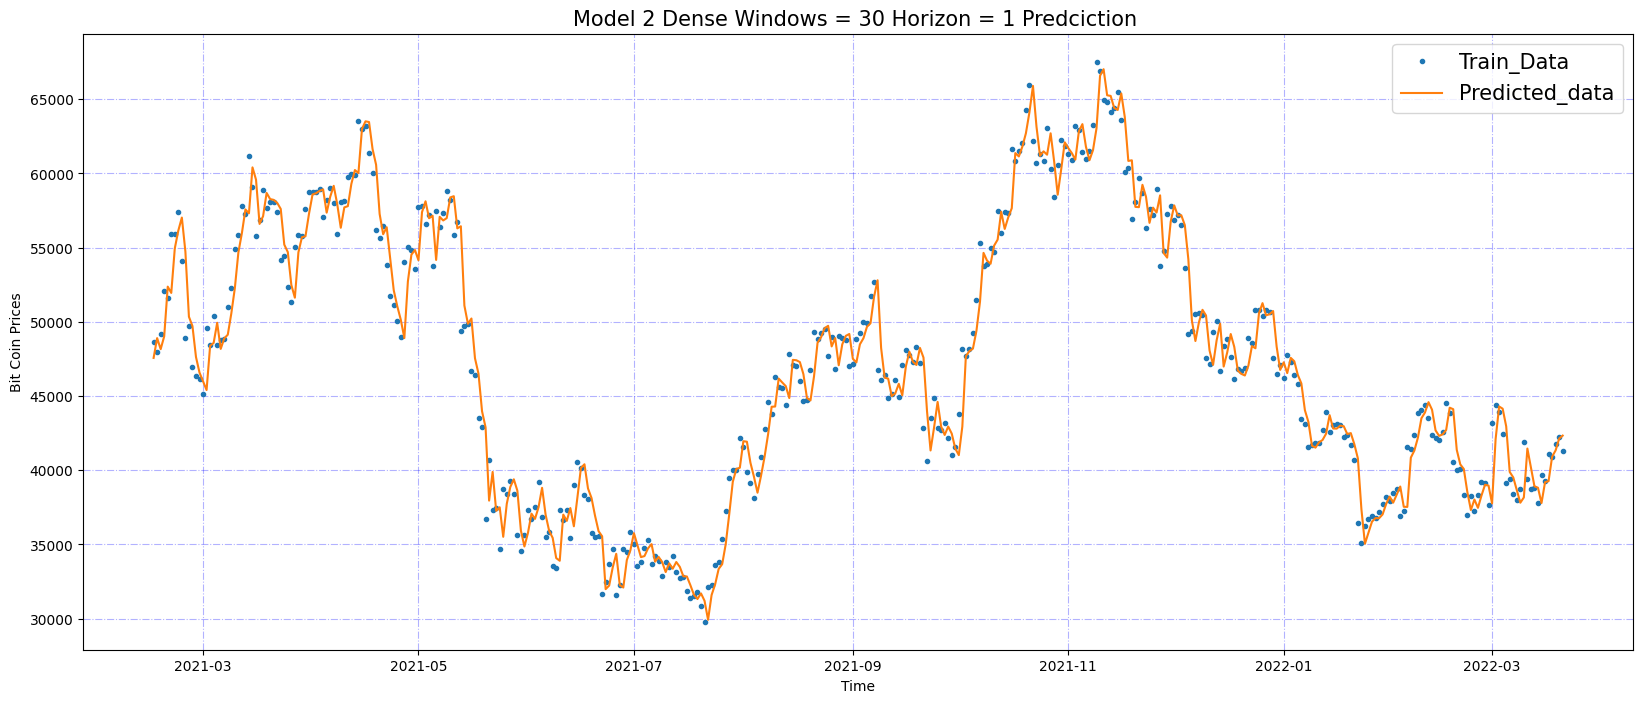

In [60]:
# Plot Of prediction and actual data
offset=200
end=600
plt.figure(figsize=(20,8))
plot_time_series(timestep=time[-len(test_labels_model_2):],value=test_labels_model_2,start=offset,end=end,label='Train_Data')
plot_time_series(timestep=time[-len(test_labels_model_2):],value=test_label_model_2_preds,format='-',start=offset,end=end,label='Predicted_data')
plt.title('Model 2 Dense Windows = 30 Horizon = 1 Predciction ',fontsize=15)

## Model 3: Dense (window = 30, horizon = 7)

Let's try and predict 7 days ahead given the previous 30 days.

First, we'll update the `HORIZON` and `WINDOW_SIZE` variables and create windowed data.


In [61]:
# Set Window Size annd Horizon size
WINDOW_SIZE=30
HORIZON =7

# Creating Data in window and horizon
windows_data_model_3,labels_data_model_3 = make_windows(x=prices,
                                                      WINDOW_SIZE=WINDOW_SIZE,
                                                      HORIZON=HORIZON
                                                     )
len(windows_data_model_3),len(labels_data_model_3)

(4538, 4538)

In [62]:
for i in range(3):
    if i!=0:
        print(f'No: {i}\nWindows: {windows_data_model_3[-i]}\n\n',f' Lbels:--> {labels_data_model_3[-i]}\n------')

No: 1
Windows: [16441.3 16902.8 16831.8 16820.6 16779.1 16837.2 16831.8 16918.1 16706.1
 16546.2 16636.4 16607.2 16537.4 16618.4 16674.3 16674.2 16852.1 16829.8
 16950.9 16943.6 17119.  17180.1 17439.1 17942.3 18851.3 19927.  20958.2
 20879.8 21184.2 21137.1]

  Lbels:--> [20670.6 21081.2 22677.2 22775.7 22707.8 22915.5 23010.7]
------
No: 2
Windows: [16741.1 16441.3 16902.8 16831.8 16820.6 16779.1 16837.2 16831.8 16918.1
 16706.1 16546.2 16636.4 16607.2 16537.4 16618.4 16674.3 16674.2 16852.1
 16829.8 16950.9 16943.6 17119.  17180.1 17439.1 17942.3 18851.3 19927.
 20958.2 20879.8 21184.2]

  Lbels:--> [21137.1 20670.6 21081.2 22677.2 22775.7 22707.8 22915.5]
------


In [63]:
# Train/ Test Splits
train_windows_model_3,train_labels_model_3,test_windows_model_3,test_labels_model_3 = make_train_test_split(windows=windows_data_model_3,
                                                                                                             labels=labels_data_model_3
                                                                                                            )
len(train_windows_model_3),len(train_labels_model_3),len(test_windows_model_3),len(test_labels_model_3)

(3630, 3630, 908, 908)

Now let's build, compile, fit and evaluate a model.

In [64]:
# Set Random seed
tf.random.set_seed(42)

# Construct model
model_3 =tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(HORIZON)
],name='model_3_Dense')

# Compile Model_3
model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam()
               )

# Fit Model_3
model_3_history = model_3.fit(x=train_windows_model_3,
                              y=train_labels_model_3,
                              epochs=100,
                              verbose=0,
                              validation_data=(test_windows_model_3,test_labels_model_3),
                              callbacks=[model_check_point(model_name='model_3_dense')]
)

INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_exeriments\model_3_dense\assets


In [65]:
# Evaluate Model_3
model_3.evaluate(test_windows_model_3,test_labels_model_3)

29/29 [==============================] - 0s 1ms/step - loss: 1935.3439


1935.3438720703125

In [66]:
# Evaluate the Best Model_3 which is loaded from Check Point
model_3= tf.keras.models.load_model("model_exeriments/model_3_dense")
model_3.evaluate(test_windows_model_3,test_labels_model_3)

29/29 [==============================] - 0s 2ms/step - loss: 1896.1292


1896.129150390625

In [67]:
# Making prediction From Model_3
test_labels_model_3_pred = make_predict(model=model_3,
                                        input_data=test_windows_model_3
                                        )
test_labels_model_3_pred[:2]

29/29 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(2, 7), dtype=float32, numpy=
array([[9544.359 , 9549.042 , 9496.539 , 9586.9375, 9467.107 , 9446.8545,
        9408.66  ],
       [9650.694 , 9651.446 , 9588.49  , 9689.37  , 9579.969 , 9550.237 ,
        9488.023 ]], dtype=float32)>

In [68]:
# Cheking Results
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels_model_3_pred),
                                y_pred=test_labels_model_3
                               )
model_3_results

{'mae': array([ 1229.1287  ,  1429.1671  ,  1366.0431  ,   475.19824 ,
          299.12027 ,   275.29813 ,   329.89398 ,   326.72656 ,
          335.15738 ,   279.84222 ,   363.6953  ,   446.9637  ,
          117.78292 ,   235.22629 ,   161.89941 ,   187.68346 ,
          193.80037 ,   298.7571  ,   314.13504 ,   335.3538  ,
          198.08846 ,   146.42006 ,   152.54576 ,   132.3524  ,
          285.41226 ,   251.51437 ,   157.0992  ,   168.02971 ,
          154.1363  ,   133.41756 ,   185.09334 ,   189.96582 ,
          288.72754 ,   329.62332 ,   452.2154  ,   462.67203 ,
          624.805   ,   757.7617  ,   934.50714 ,  1364.7754  ,
         1195.9745  ,   122.07533 ,   169.65793 ,   382.10016 ,
          214.67899 ,   248.34193 ,   470.4912  ,   508.2973  ,
          507.04688 ,   464.43094 ,   566.17523 ,   637.76434 ,
          395.11398 ,   203.90848 ,   186.25125 ,   226.19824 ,
          235.78795 ,   317.23383 ,   229.19002 ,   272.11566 ,
          281.55566 ,   481.72168

## Make our evaluation function work for larger horizons

You'll notice the outputs for `model_3_results` are multi-dimensional. 

This is because the predictions are getting evaluated across the `HORIZON` timesteps (7 predictions at a time).

To fix this, let's adjust our `evaluate_preds()` function to work with multiple shapes of data.

In [69]:
def evaluate_preds(y_true, y_pred):
    
  
    # Calculate various metrics
    ma = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.reduce_mean(tf.keras.metrics.mean_squared_error(y_true, y_pred))
    rmse = tf.reduce_mean(tf.sqrt(mse))
    mape = tf.reduce_mean(tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred))
    mae = tf.reduce_mean(tf.squeeze(ma))
    
  
    return  {'mae': mae.numpy(),
             'mse': mse.numpy(),
             'rmse': rmse.numpy() ,
             'mape': mape.numpy()
             }

In [70]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels_model_3_pred),
                                y_pred=test_labels_model_3
                               )
model_3_results

{'mae': 1896.1292037666183,
 'mse': 8055281.7536708545,
 'rmse': 2838.1828259770114,
 'mape': 5.495257099117026}

In [71]:
len(test_labels_model_3)

908

Time to visualize.

If our prediction evaluation metrics were mutli-dimensional, how do you think the predictions will look like if we plot them?

Text(0.5, 1.0, 'Model 3 Dense Windows = 30 Horizon = 7 Predciction ')

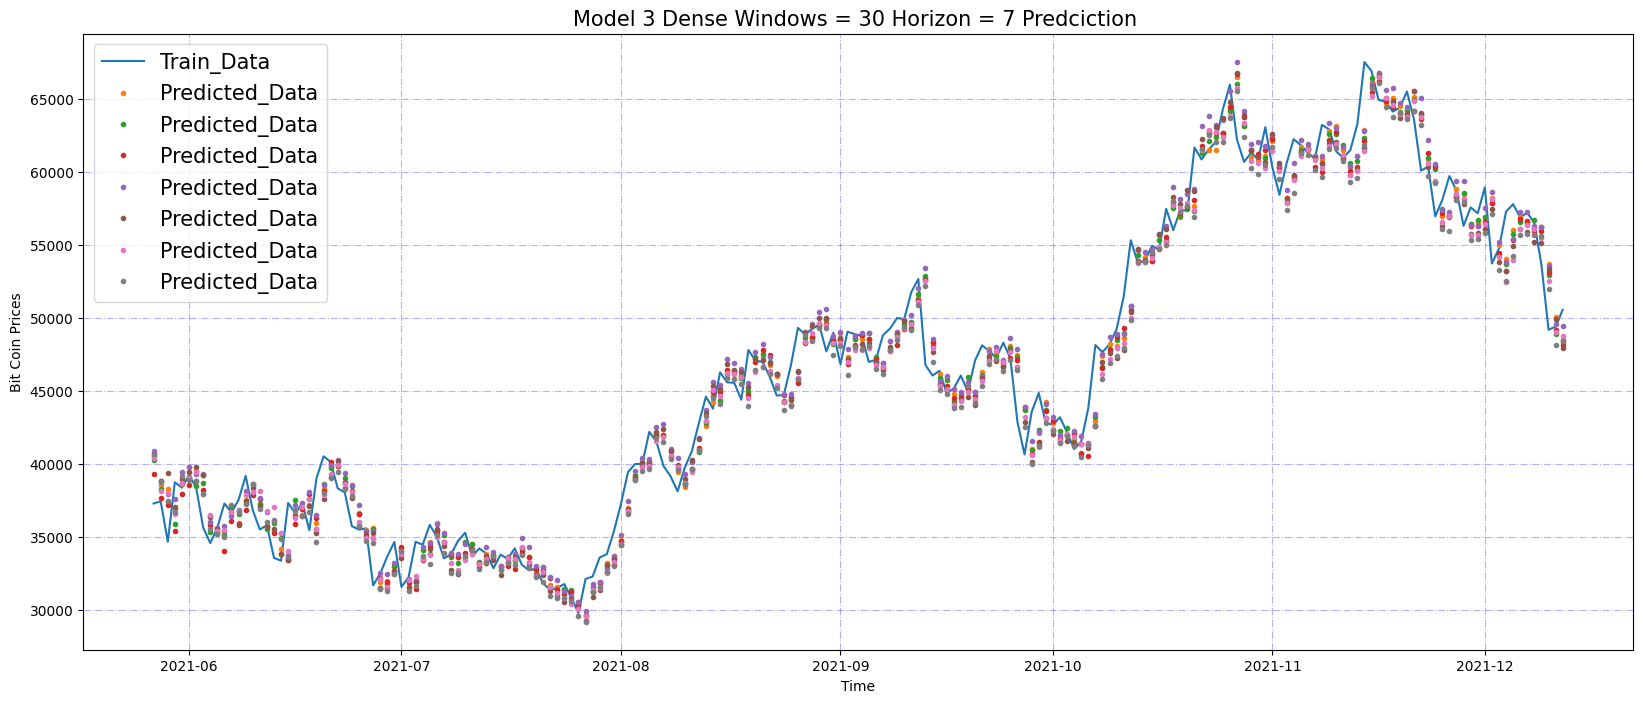

In [72]:
# Plot Evaluation of 
offset=300
end=500
plt.figure(figsize=(20,8))
plot_time_series(timestep=time[-len(test_labels_model_3):],value=test_labels_model_3[:,0],start=offset,end=end,format='-',label='Train_Data')
plot_time_series(timestep=time[-len(test_labels_model_3):],value=test_labels_model_3_pred,start=offset,end=end,label='Predicted_Data')
plt.title('Model 3 Dense Windows = 30 Horizon = 7 Predciction ',fontsize=15)

When we try to plot our multi-horizon predicts, we get a funky looking plot.

Again, we can fix this by aggregating our model's predictions.

Text(0.5, 1.0, 'Model 3 Dense Windows = 30 Horizon = 7 Predciction ')

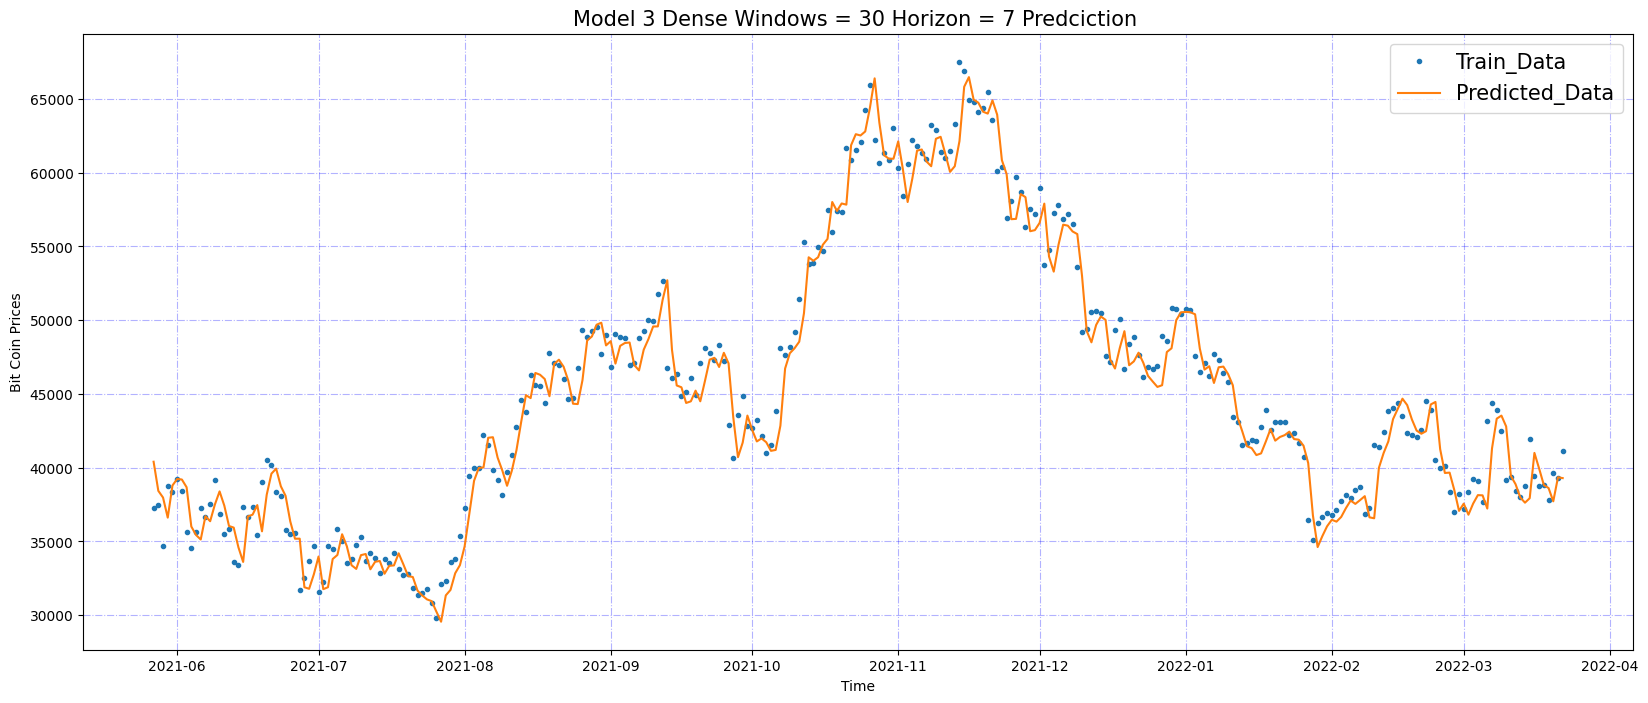

In [73]:
# Plot Evaluation of 
offset=300
end=600
plt.figure(figsize=(20,8))
plot_time_series(timestep=time[-len(test_labels_model_3):],value=test_labels_model_3[:,0],start=offset,end=end,label='Train_Data')
plot_time_series(timestep=time[-len(test_labels_model_3):],value=tf.reduce_mean(test_labels_model_3_pred,axis=1),start=offset,end=end,format='-',label='Predicted_Data')
plt.title('Model 3 Dense Windows = 30 Horizon = 7 Predciction ',fontsize=15)

In [74]:
# Converting hrizon=7 into mean 
values_model_3 = tf.reduce_mean(test_labels_model_3_pred).numpy()
values_model_3 # this is wrong because it takes average of data but we want to take average along axis not average of all Data 

33095.844

In [75]:
# Converting hrizon=7 into mean along axis=1
values_model_3 = tf.reduce_mean(test_labels_model_3_pred,axis=1)
values_model_3[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 9499.929,  9599.748,  9824.915, 10744.56 , 10960.095, 11110.515,
       11148.375, 11324.245, 11808.511, 11319.493], dtype=float32)>

## Which of our models is performing best so far?

So far, we've trained 3 models which use the same architecture but use different data inputs.

Let's compare them with the naïve model to see which model is performing the best so far.

In [76]:
result_all = pd.DataFrame({'Naive_model': naive_result,
                          'Windows_7_Horizon_1': model_1_results,
                          'Windows_30_Horizon_1': model_2_results,
                          'Windows_30_Horizons_7': model_3_results
    
})
result_all = result_all.T
result_all = result_all.sort_values(['mae'],ascending=True)
result_all

,mae,mse,rmse,mape
Naive_model,905.292419,1.938106e+06,1392.158936,2.595423
Windows_7_Horizon_1,907.851929,1.950373e+06,1396.557617,2.603221
Windows_30_Horizon_1,934.311340,2.008169e+06,1417.098633,2.664274
Windows_30_Horizons_7,1896.129204,8.055282e+06,2838.182826,5.495257


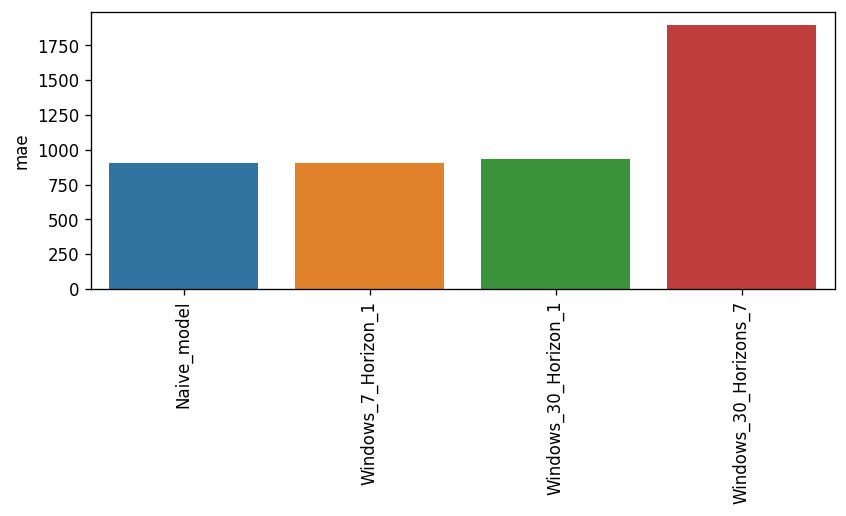

In [77]:
plt.figure(figsize=(8,3),dpi=120)
sns.barplot(data=result_all,y='mae',x=result_all.index)
plt.xticks(rotation=90);

## Model 4: Conv1D

Onto the next modelling experiment!

This time, we'll be using a Conv1D model. Because as we saw in the sequence modelling notebook, Conv1D models can be used for seq2seq (sequence to sequence) problems.

In our case, the input sequence is the previous 7 days of Bitcoin price data and the output is the next day (in seq2seq terms this is called a many to one problem).

* Since we will use **Window = 7** and **Horizon = 1** . We will use `model_1` test train split.


In [78]:
# Set Size of windows and horizon
WINDOW_SIZE=7
HORIZON=1

# Creating data from row data in window and horizon form.
full_windows_data = windows_data_model_1
full_labels_data = labels_data_model_1
len(full_windows_data),len(full_labels_data)

(4566, 4566)

In [79]:
for i in range(5):
    if i!=0:
        print(f'No: {i}\nWindows: {full_windows_data[-i]}\n\n',f' Lbels:--> {full_labels_data[-i]}\n------')

No: 1
Windows: [21184.2 21137.1 20670.6 21081.2 22677.2 22775.7 22707.8]

  Lbels:--> [22915.5]
------
No: 2
Windows: [20879.8 21184.2 21137.1 20670.6 21081.2 22677.2 22775.7]

  Lbels:--> [22707.8]
------
No: 3
Windows: [20958.2 20879.8 21184.2 21137.1 20670.6 21081.2 22677.2]

  Lbels:--> [22775.7]
------
No: 4
Windows: [19927.  20958.2 20879.8 21184.2 21137.1 20670.6 21081.2]

  Lbels:--> [22677.2]
------


In [80]:
# making Train Test Split
full_train_windows_data,full_train_labels_data,full_test_windows_data,full_test_labels_data = make_train_test_split(windows=full_windows_data,
                                                                                                                    labels=full_labels_data,
                                                                                                                    test_split=0.2
                                                                                                                   )
len(full_train_windows_data),len(full_train_labels_data),len(full_test_windows_data),len(full_test_labels_data)

(3653, 3653, 913, 913)

To fix this, we could adjust the shape of all of our `train_windows` or we could use a [`tf.keras.layers.Lamdba`](https://keras.io/api/layers/core_layers/lambda/) (called a Lambda layer) to do this for us in our model.

The Lambda layer wraps a function into a layer which can be used with a model.

Let's try it out.

In [81]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(full_train_windows_data[2000])
expand_dim_layer = tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=1))
print(f"Orignal Shape: {x.shape}")
print(f"Expanded Shape: {expand_dim_layer(x).shape}")
print(f"Original Data: {x}")
print(f"Expanded Data:\n {expand_dim_layer(x)}")

Orignal Shape: (7,)
Expanded Shape: (7, 1)
Original Data: [452.9 448.3 446.2 447.7 445.  432.2 429.1]
Expanded Data:
 [[452.9]
 [448.3]
 [446.2]
 [447.7]
 [445. ]
 [432.2]
 [429.1]]


In [82]:
# Calling Layers
from tensorflow.keras import layers

# Set Random seed
tf.random.set_seed(42)

# Construction of Model
model_4 = tf.keras.models.Sequential([
    layers.Lambda(lambda x:tf.expand_dims(x,axis=1)),
    layers.Conv1D(filters=200,kernel_size=5,activation='relu',padding='causal'),
    layers.GlobalAveragePooling1D(),
    layers.Dense(HORIZON)
])

# Compile Model_4
model_4.compile(loss='mae',
                optimizer = tf.keras.optimizers.Adam()
               )

# Fit Model

model_4_history = model_4.fit(x=full_train_windows_data,
                              y=full_train_labels_data,
                              batch_size=200,
                              epochs=100,
                              validation_data=(full_test_windows_data,full_test_labels_data),
                              callbacks=[model_check_point(model_name='model_4_conv1d')],
                              verbose=0
                             )

INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


INFO:tensorflow:Assets written to: model_exeriments\model_4_conv1d\assets


In [83]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 200)            7200      
                                                                 
 global_average_pooling1d (G  (None, 200)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_6 (Dense)             (None, 1)                 201       
                                                                 
Total params: 7,401
Trainable params: 7,401
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Evaluate Model_4
model_4.evaluate(full_test_windows_data,full_test_labels_data)

29/29 [==============================] - 0s 1ms/step - loss: 1074.4354


1074.4354248046875

In [85]:
# Load Best data and evaluate The data
model_4 = tf.keras.models.load_model('model_exeriments/model_4_conv1d')
model_4.evaluate(full_test_windows_data,full_test_labels_data)

29/29 [==============================] - 0s 2ms/step - loss: 914.4730


914.4730224609375

In [86]:
# Geting Prediction from model_4
full_test_labels_pred_4 = make_predict(model=model_4,
                                     input_data=full_test_windows_data
                                    )
full_test_labels_pred_4[:10]

29/29 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 9566.222,  9685.724,  9912.992, 10880.841, 11011.965, 11104.872,
       11140.299, 11329.564, 11756.201, 11220.257], dtype=float32)>

In [87]:
# Getting Result of Model_4
model_4_results = evaluate_preds(y_true=tf.squeeze(full_test_labels_data),
                                 y_pred=full_test_labels_pred_4
                                )
model_4_results

{'mae': 914.47314, 'mse': 1973806.5, 'rmse': 1404.9222, 'mape': 2.6174495}

In [88]:
naive_result

{'mae': 905.2924, 'mse': 1938106.5, 'rmse': 1392.1589, 'mape': 2.5954235}

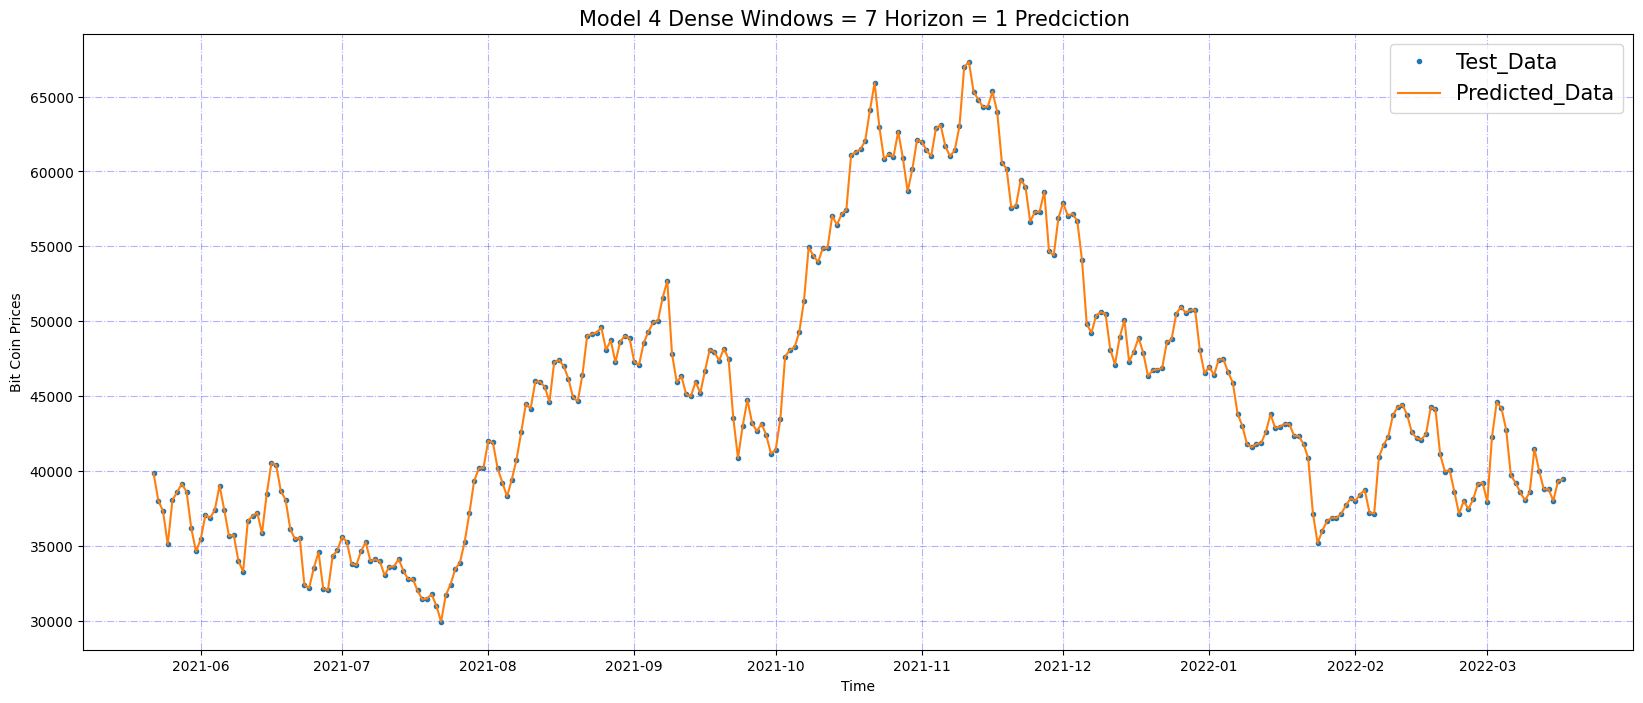

In [89]:
# Plot Evaluation of 
offset=300
end=600
plt.figure(figsize=(20,8))
plot_time_series(timestep=time[-len(full_test_labels_pred_4):],value=full_test_labels_pred_4,start=offset,end=end,label='Test_Data')
plot_time_series(timestep=time[-len(full_test_labels_pred_4):],value=full_test_labels_pred_4,start=offset,end=end,format='-',label='Predicted_Data')
plt.title('Model 4 Dense Windows = 7 Horizon = 1 Predciction ',fontsize=15)
plt.show()

## Model 5: RNN (LSTM)

As you might've guessed, we can also use a recurrent neural network to model our sequential time series data.

Let's reuse the same data we used for the Conv1D model, except this time we'll create an [LSTM-cell](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) powered RNN to model our Bitcoin data. 

Once again, one of the most important steps for the LSTM model will be getting our data into the right shape.

The [`tf.keras.layers.LSTM()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) layer takes a tensor with `[batch, timesteps, feature]` dimensions.

As mentioned earlier, the `batch` dimension gets taken care of for us but our data is currently only has the `feature` dimension (`WINDOW_SIZE`).

To fix this, just like we did with the `Conv1D` model, we can use a `tf.keras.layers.Lambda()` layer to adjust the shape of our input tensors to the LSTM layer.



In [90]:
# Set Random seed
tf.random.set_seed(48)

# Costruction of Model_5
inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE))
x = tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=1))(inputs)
x = tf.keras.layers.LSTM(300,activation='relu')(x)
x = tf.keras.layers.Dense(300,activation='relu')(x)
x = tf.keras.layers.Dense(100,activation='relu')(x)
x = tf.keras.layers.Dense(10,activation='relu')(x)
outputs = tf.keras.layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs,outputs,name='model_5_LSTM')

# Compile
model_5.compile(loss= 'mae',
                optimizer= tf.keras.optimizers.Adam()
               )

In [91]:
model_5.summary()

Model: "model_5_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm (LSTM)                 (None, 300)               369600    
                                                                 
 dense_7 (Dense)             (None, 300)               90300     
                                                                 
 dense_8 (Dense)             (None, 100)               30100     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
 dense_10 (Dense)            (None, 1)                

In [92]:
# Fit the Model_5
model_5_history = model_5.fit(x=full_train_windows_data,
                              y=full_train_labels_data,
                              batch_size=200,
                              validation_data=(full_test_windows_data,full_test_labels_data),
                              callbacks=[model_check_point(model_name='model_5')],
                              verbose=0
                             )

INFO:tensorflow:Assets written to: model_exeriments\model_5\assets


INFO:tensorflow:Assets written to: model_exeriments\model_5\assets


In [93]:
# Evaluate the Data
model_5.evaluate(full_test_windows_data,full_test_labels_data)

29/29 [==============================] - 0s 3ms/step - loss: 4466.1470


4466.14697265625

In [94]:
# # Load Best data and evaluate The data
model_5 = tf.keras.models.load_model("model_exeriments/model_5")
model_5.evaluate(full_test_windows_data,full_test_labels_data)

29/29 [==============================] - 0s 4ms/step - loss: 4466.1470


4466.14697265625

In [95]:
# Make predictions with our LSTM model
full_test_labels_pred_5 = make_predict(model=model_5,
                                     input_data=full_test_windows_data
                                     )
full_test_labels_pred_5[:10]

29/29 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8100.512, 8183.98 , 8267.908, 8723.153, 9001.433, 9224.099,
       9369.62 , 9570.718, 9860.108, 9735.86 ], dtype=float32)>

In [96]:
model_5_results = evaluate_preds(y_true=tf.squeeze(full_test_labels_data),
                                 y_pred=full_test_labels_pred_5
                                )
model_5_results

{'mae': 4466.147, 'mse': 27765562.0, 'rmse': 5269.3037, 'mape': 13.476346}

Hmmm... it seems even with an LSTM-powered RNN we weren't able to beat our naïve models results.

Perhaps adding another variable will help?

> **Note:** I'm putting this here again as a reminder that because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results. You're probably starting to clue onto this now.

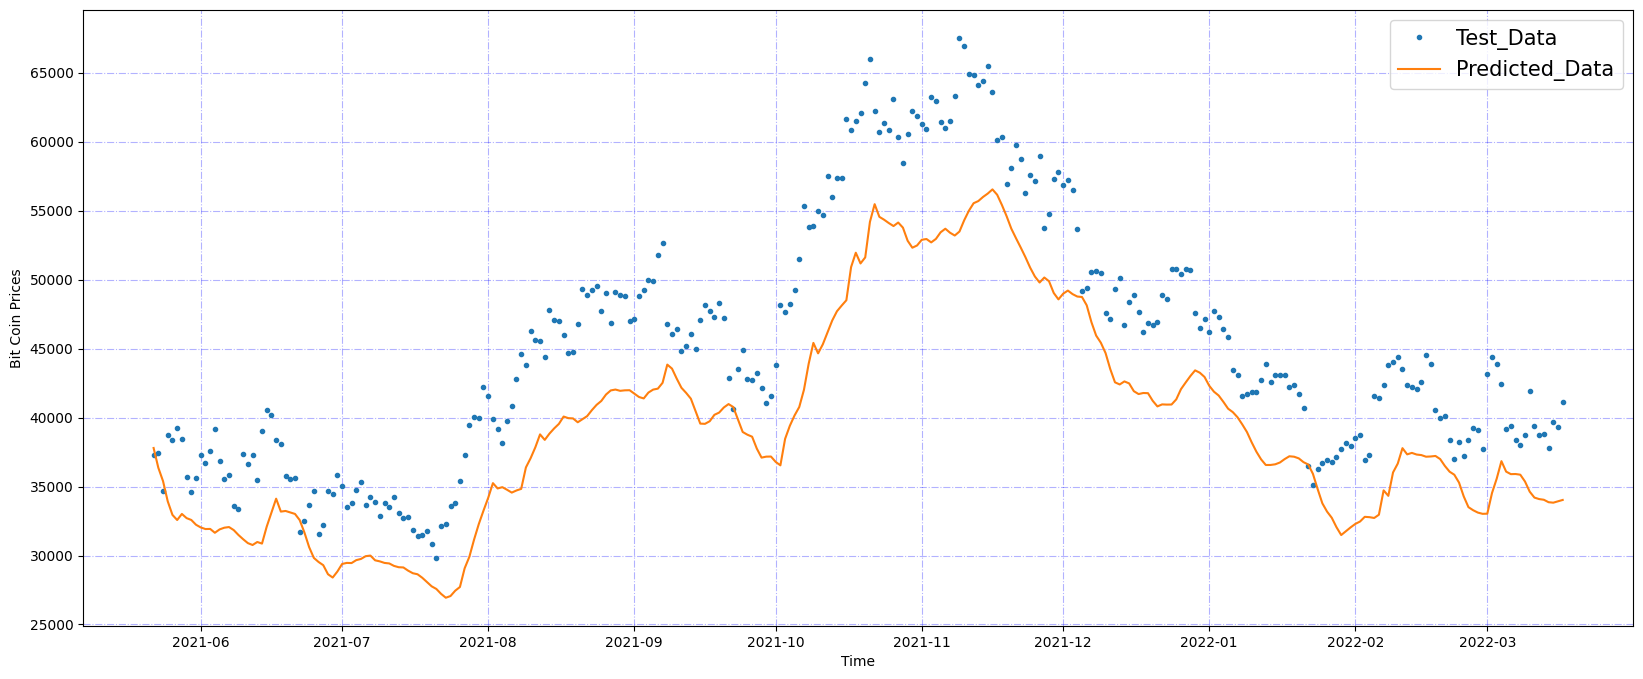

In [98]:
# Plot Evaluation of 
offset=300
end=600
plt.figure(figsize=(20,8))
plot_time_series(timestep=time[-len(full_test_labels_data):],value=full_test_labels_data,start=offset,end=end,label='Test_Data')
plot_time_series(timestep=time[-len(full_test_labels_data):],value=full_test_labels_pred_5,start=offset,end=end,label='Predicted_Data',format='-')

## Make a multivariate time series 

So far all of our models have barely kept up with the naïve forecast.
And so far all of them have been trained on a single variable (also called univariate time series): the historical price of Bitcoin.
Alright, time to add another feature column, the block reward size.

First, we'll need to create variables for the different block reward sizes as well as the dates they came into play.

The following block rewards and dates were sourced from [cmcmarkets.com](https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving).

| Block Reward | Start Date |
| ----- | ----- |
| 50 | 3 January 2009 (2009-01-03) |
| 25 | 28 November 2012 |
| 12.5 | 9 July 2016 |
| 6.25 | 11 May 2020 |
| 3.125 | TBA (expected 2024) |
| 1.5625 | TBA (expected 2028) | 


In [99]:
bit_coin_price.head()

,Price
Date,
2010-07-18,0.1
2010-07-19,0.1
2010-07-20,0.1
2010-07-21,0.1
2010-07-22,0.1


In [100]:
# Making block reward DataFrame 
import datetime
block_rewards = pd.DataFrame( {'Start Date':[datetime.datetime(2010,7,18),datetime.datetime(2012,11,28),datetime.datetime(2016,7,9),datetime.datetime(2020,5,11)],
                               'Block Reward':[25,50,12.5,6.25]}) 
block_rewards = block_rewards.set_index('Start Date')
block_rewards

,Block Reward
Start Date,
2010-07-18,25.00
2012-11-28,50.00
2016-07-09,12.50
2020-05-11,6.25


In [101]:
# Add block_reward column
bitcoin_pricess_book = bit_coin_price.copy()
bitcoin_pricess_book['Block Reward'] = None
bitcoin_pricess_book.head()

,Price,Block Reward
Date,,
2010-07-18,0.1,None
2010-07-19,0.1,None
2010-07-20,0.1,None
2010-07-21,0.1,None
2010-07-22,0.1,None


In [102]:
# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_pricess_book.loc[:'2012-11-28','Block Reward']=50.
bitcoin_pricess_book.loc['2012-11-28':'2016-07-09','Block Reward']=25.
bitcoin_pricess_book.loc['2016-07-09':'2020-05-11','Block Reward']=12.5
bitcoin_pricess_book.loc['2020-05-11':,'Block Reward']=6.25

In [103]:
bitcoin_pricess_book['Block Reward'].value_counts()

12.50    1402
25.00    1319
6.25      989
50.00     864
Name: Block Reward, dtype: int64

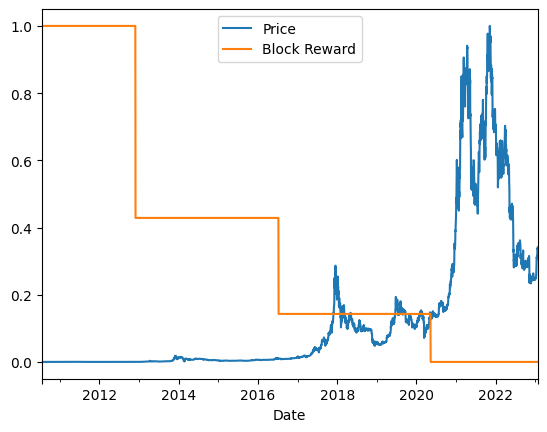

In [104]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
bitcoin_pricess_book = pd.DataFrame(minmax_scale(bitcoin_pricess_book[['Price','Block Reward']]),
                                    index=bitcoin_pricess_book.index,
                                    columns=bitcoin_pricess_book.columns
                                   )

bitcoin_pricess_book.plot().legend();

When we scale the block reward and the Bitcoin price, we can see the price goes up as the block reward goes down, perhaps this information will be helpful to our model's performance.

In [105]:
# Cheking final data frame with block reward after minmax scale
bitcoin_pricess_book

,Price,Block Reward
Date,,
2010-07-18,0.000000,1.0
2010-07-19,0.000000,1.0
2010-07-20,0.000000,1.0
2010-07-21,0.000000,1.0
2010-07-22,0.000000,1.0
...,...,...
2023-01-20,0.335819,0.0
2023-01-21,0.337277,0.0
2023-01-22,0.336272,0.0


## Making a windowed dataset with pandas

Previously, we used some custom made functions to window our **univariate** time series.

However, since we've just added another variable to our dataset, these functions won't work.

Not to worry though. Since our data is in a pandas DataFrame, we can leverage the [`pandas.DataFrame.shift()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html) method to create a windowed **multivariate** time series.

The `shift()` method offsets an index by a specified number of periods.

Now that we've got a windowed dataset, let's separate features (`X`) from labels (`y`).

Remember in our windowed dataset, we're trying to use the previous `WINDOW_SIZE` steps to predict `HORIZON` steps.

```
Window for a week (7) to predict a horizon of 1 (multivariate time series)
WINDOW_SIZE & block_reward -> HORIZON

[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

We'll also remove the `NaN` values using pandas [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) method, this equivalent to starting our windowing function at `sample 0 (the first sample) + WINDOW_SIZE`.


In [106]:
# Windows and horizon
WINDOW_SIZE=7
HORIZON=1

In [107]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_pricess_book_windowed = bitcoin_pricess_book.copy()


# Add windowed columns
for i in range(WINDOW_SIZE):# Shift values for each step in WINDOW_SIZE
    bitcoin_pricess_book_windowed[f"Price_{i+1}"]=bitcoin_pricess_book_windowed['Price'].shift(periods=i+1)
    
bitcoin_pricess_book_windowed.tail(10)

,Price,Block Reward,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7
Date,,,,,,,,,
2023-01-15,0.309202,0.0,0.310363,0.295092,0.279162,0.265701,0.258249,0.254414,0.253509
2023-01-16,0.313709,0.0,0.309202,0.310363,0.295092,0.279162,0.265701,0.258249,0.254414
2023-01-17,0.313012,0.0,0.313709,0.309202,0.310363,0.295092,0.279162,0.265701,0.258249
2023-01-18,0.306104,0.0,0.313012,0.313709,0.309202,0.310363,0.295092,0.279162,0.265701
2023-01-19,0.312184,0.0,0.306104,0.313012,0.313709,0.309202,0.310363,0.295092,0.279162
2023-01-20,0.335819,0.0,0.312184,0.306104,0.313012,0.313709,0.309202,0.310363,0.295092
2023-01-21,0.337277,0.0,0.335819,0.312184,0.306104,0.313012,0.313709,0.309202,0.310363
2023-01-22,0.336272,0.0,0.337277,0.335819,0.312184,0.306104,0.313012,0.313709,0.309202
2023-01-23,0.339348,0.0,0.336272,0.337277,0.335819,0.312184,0.306104,0.313012,0.313709


In [108]:
# check the lenght of windowed data
len(bitcoin_pricess_book_windowed)

4574

In [109]:
bitcoin_pricess_book_windowed = bitcoin_pricess_book_windowed.dropna().astype('float32')
bitcoin_pricess_book_windowed

,Price,Block Reward,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7
Date,,,,,,,,,
2010-07-25,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-07-26,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-07-27,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-07-28,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-07-29,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2023-01-20,0.335819,0.0,0.312184,0.306104,0.313012,0.313709,0.309202,0.310363,0.295092
2023-01-21,0.337277,0.0,0.335819,0.312184,0.306104,0.313012,0.313709,0.309202,0.310363
2023-01-22,0.336272,0.0,0.337277,0.335819,0.312184,0.306104,0.313012,0.313709,0.309202


In [110]:
len(bitcoin_pricess_book_windowed)

4567

In [111]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_pricess_book_windowed.drop('Price',axis=1)
y = bitcoin_pricess_book_windowed['Price']
X.head()

,Block Reward,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7
Date,,,,,,,,
2010-07-25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-07-26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-07-27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-07-28,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-07-29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
X.tail()

,Block Reward,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7
Date,,,,,,,,
2023-01-20,0.0,0.312184,0.306104,0.313012,0.313709,0.309202,0.310363,0.295092
2023-01-21,0.0,0.335819,0.312184,0.306104,0.313012,0.313709,0.309202,0.310363
2023-01-22,0.0,0.337277,0.335819,0.312184,0.306104,0.313012,0.313709,0.309202
2023-01-23,0.0,0.336272,0.337277,0.335819,0.312184,0.306104,0.313012,0.313709
2023-01-24,0.0,0.339348,0.336272,0.337277,0.335819,0.312184,0.306104,0.313012


In [113]:
# View labels
y

Date
2010-07-25    0.000000
2010-07-26    0.000000
2010-07-27    0.000000
2010-07-28    0.000000
2010-07-29    0.000000
                ...   
2023-01-20    0.335819
2023-01-21    0.337277
2023-01-22    0.336272
2023-01-23    0.339348
2023-01-24    0.340757
Name: Price, Length: 4567, dtype: float32

In [114]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(3653, 3653, 914, 914)

In [115]:
# set Random seed
tf.random.set_seed(42)

# Construct model_6
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile 
model_6.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam()
               )

# Fit The model
model_6_history = model_6.fit(x=X_train,
                              y=y_train,
                              epochs=100,
                              validation_data=(X_test,y_test),
                              callbacks=[model_check_point(model_name='model_6_dense_multivariable')],
                              verbose=0
                             )

INFO:tensorflow:Assets written to: model_exeriments\model_6_dense_multivariable\assets


INFO:tensorflow:Assets written to: model_exeriments\model_6_dense_multivariable\assets


INFO:tensorflow:Assets written to: model_exeriments\model_6_dense_multivariable\assets


INFO:tensorflow:Assets written to: model_exeriments\model_6_dense_multivariable\assets


INFO:tensorflow:Assets written to: model_exeriments\model_6_dense_multivariable\assets


INFO:tensorflow:Assets written to: model_exeriments\model_6_dense_multivariable\assets


INFO:tensorflow:Assets written to: model_exeriments\model_6_dense_multivariable\assets


INFO:tensorflow:Assets written to: model_exeriments\model_6_dense_multivariable\assets


INFO:tensorflow:Assets written to: model_exeriments\model_6_dense_multivariable\assets


INFO:tensorflow:Assets written to: model_exeriments\model_6_dense_multivariable\assets


INFO:tensorflow:Assets written to: model_exeriments\model_6_dense_multivariable\assets


INFO:tensorflow:Assets written to: model_exeriments\model_6_dense_multivariable\assets


INFO:tensorflow:Assets written to: model_exeriments\model_6_dense_multivariable\assets


INFO:tensorflow:Assets written to: model_exeriments\model_6_dense_multivariable\assets


INFO:tensorflow:Assets written to: model_exeriments\model_6_dense_multivariable\assets


INFO:tensorflow:Assets written to: model_exeriments\model_6_dense_multivariable\assets


INFO:tensorflow:Assets written to: model_exeriments\model_6_dense_multivariable\assets


INFO:tensorflow:Assets written to: model_exeriments\model_6_dense_multivariable\assets


In [116]:
# Evaluation of Model_6
model_6.evaluate(X_test,y_test)

29/29 [==============================] - 0s 2ms/step - loss: 0.0253


0.025326821953058243

In [117]:
# Loading best model from check point
model_6 = tf.keras.models.load_model('model_exeriments/model_6_dense_multivariable')
model_6.evaluate(X_test,y_test)

29/29 [==============================] - 0s 1ms/step - loss: 0.0142


0.014157571829855442

In [118]:
# Make predictions on multivariate data
model_6_preds= make_predict(model=model_6,
                            input_data=X_test
                           )
model_6_preds[:10]

29/29 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.14422154, 0.14607522, 0.14887075, 0.15961254, 0.1610986 ,
       0.16393659, 0.16599566, 0.16947898, 0.17528474, 0.16977096],
      dtype=float32)>

In [122]:
y.mean()

0.12840915

In [119]:
# Results
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds
                                )
model_6_results

{'mae': 0.014157572,
 'mse': 0.0004476128,
 'rmse': 0.021156862,
 'mape': 2.8291817}

In [120]:
model_1_results

{'mae': 907.8519, 'mse': 1950373.1, 'rmse': 1396.5576, 'mape': 2.603221}

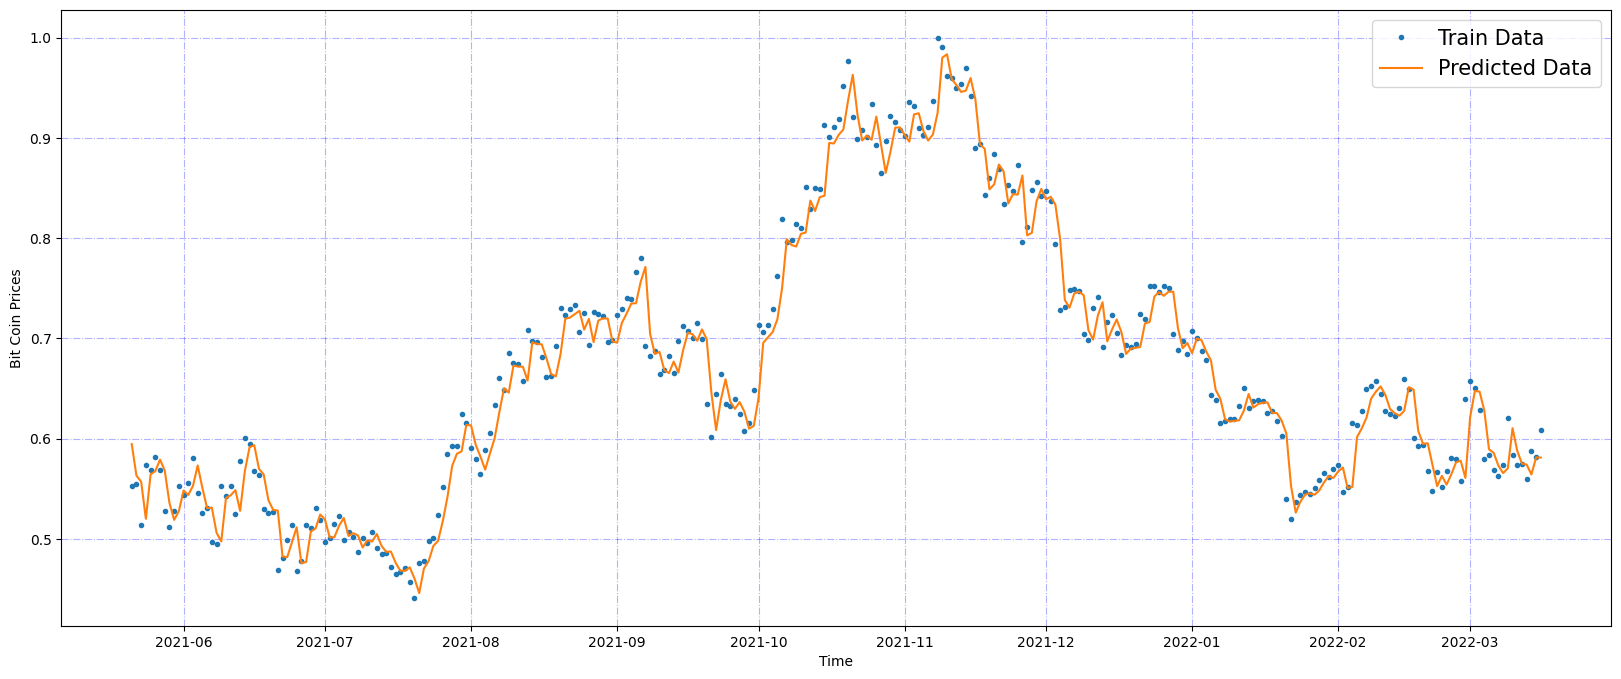

In [121]:
# Plot Evaluation of 
offset=300
end=600
plt.figure(figsize=(20,8))
plot_time_series(timestep=time[-len(X_test):],value=y_test,label='Train Data',start=offset,end=end)
plot_time_series(timestep=time[-len(X_test):],value=model_6_preds,format='-',label='Predicted Data',start=offset,end=end)

# **The End**

### Result :

**Best Model for this time series is `model_4`: `Conv1D`**